## Finding the Happiest and Most Developed Countries using Choropleth Maps

In this project, I used Geopandas to plot geospatial data. I read the __[shape file](#https://www.naturalearthdata.com/downloads/50m-cultural-vectors/50m-admin-0-countries-2/)__ to plot the countries on the world map and also read the __[csv file](#https://data.world/promptcloud/world-happiness-report-2019/workspace/data-dictionary)__ containing happiness ranks for all the countries. Using geopandas, I prepared the choropleth maps for Happiness Rank, Economic Development, Population Rank and Income Group.
Geopandas is easy to use because it is just like Pandas, but it uses geodata from shape files. Geopandas dataframes are similar to Pandas dataframes. Geopandas also allows you to create maps quickly and easily. Maps prepared in Python are easily reproducible and can be customized as per our needs. GeoPandas relies on Shapely to perform geometric operations, each country in our case will be encoded like a polygon using Shapely which will be used by Geopandas to plot. 

### Read Data

In [97]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### Read the Shapefile
Geopandas can read almost any vector-based spatial data format by using the fiona library and returns a GeoDataFrame object. Any arguments passed to read_file() after the file name will be passed directly to fiona.open, which does the actual data importation.

In [98]:
#Read the world map shape file
world_map = gpd.read_file("ne_50m_admin_0_countries.shp")

geopandas.geodataframe.GeoDataFrame

In [ ]:
#Check the data type
type(world_map)

The most important property of a GeoDataFrame is that it always has one GeoSeries column that holds a special status. This GeoSeries is referred to as the GeoDataFrame’s “geometry”.

In [99]:
#Check data
world_map.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,WIKIPEDIA,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,Zimbabwe,ZWE,0,Zimbabwe,ZWE,0,Zimbabwe,ZWE,0,Zimbabwe,Zimbabwe,ZWE,Zimbabwe,None,Zimb.,ZW,Republic of Zimbabwe,None,Zimbabwe,None,None,Zimbabwe,None,1,5,3,9,13805084,14,28330.0,2017,2002,2016,5. Emerging region: G20,5. Low income,-99,ZI,ZW,ZWE,ZWE,716,716,ZW,ZWE,23425004,23425004,Exact WOE match as country,ZWE,ZWE,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,3.0,8.0,1159321441,Q954,Ø²ÙÙ Ø¨Ø§Ø¨ÙÙ,à¦à¦¿à¦®à§à¦¬à¦¾à¦¬à§à¦¯à¦¼à§,Simbabwe,Zimbabwe,Zimbabue,Zimbabwe,ÎÎ¹Î¼ÏÎ¬Î¼ÏÎ¿Ï Îµ,à¤à¤¼à¤¿à¤®à¥à¤¬à¤¾à¤¬à¥à¤µà¥,Zimbabwe,Zimbabwe,Zimbabwe,ã¸ã³ããã¨,ì§ë°ë¸ì¨,Zimbabwe,Zimbabwe,ZimbÃ¡bue,ÐÐ¸Ð¼Ð±Ð°Ð±Ð²Ðµ,Zimbabwe,Zimbabve,Zimbabwe,è¾å·´å¨,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,Zambia,ZMB,0,Zambia,ZMB,0,Zambia,ZMB,0,Zambia,Zambia,ZMB,Zambia,None,Zambia,ZM,Republic of Zambia,None,Zambia,None,None,Zambia,None,5,8,5,13,15972000,14,65170.0,2017,2010,2016,7. Least developed region,4. Lower middle income,-99,ZA,ZM,ZMB,ZMB,894,894,ZM,ZMB,23425003,23425003,Exact WOE match as country,ZMB,ZMB,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,6,6,6,-99,1,0.0,3.0,8.0,1159321439,Q953,Ø²Ø§Ù Ø¨ÙØ§,à¦à¦¾à¦®à§à¦¬à¦¿à¦¯à¦¼à¦¾,Sambia,Zambia,Zambia,Zambie,ÎÎ¬Î¼ÏÎ¹Î±,à¤à¤¼à¤¾à¤®à¥à¤¬à¤¿à¤¯à¤¾,Zambia,Zambia,Zambia,ã¶ã³ãã¢,ì ë¹ì,Zambia,Zambia,ZÃ¢mbia,ÐÐ°Ð¼Ð±Ð¸Ñ,Zambia,Zambiya,Zambia,èµæ¯äº,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,Yemen,YEM,0,Yemen,YEM,0,Yemen,YEM,0,Yemen,Yemen,YEM,Yemen,None,Yem.,YE,Republic of Yemen,None,Yemen,None,None,"Yemen, Rep.",None,5,3,3,11,28036829,15,73450.0,2017,2004,2016,7. Least developed region,4. Lower middle income,-99,YM,YE,YEM,YEM,887,887,RY,YEM,23425002,23425002,Exact WOE match as country,YEM,YEM,-99,-99,Asia,Asia,Western Asia,Middle East & North Africa,5,5,4,-99,1,0.0,3.0,8.0,1159321425,Q805,Ø§ÙÙÙ Ù,à¦à¦¯à¦¼à§à¦®à§à¦¨,Jemen,Yemen,Yemen,YÃ©men,Î¥ÎµÎ¼Î­Î½Î·,à¤¯à¤®à¤¨,Jemen,Yaman,Yemen,ã¤ã¨ã¡ã³,ìë©,Jemen,Jemen,IÃ©men,ÐÐµÐ¼ÐµÐ½,Jemen,Yemen,Yemen,ä¹é¨,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,Vietnam,VNM,0,Vietnam,VNM,0,Vietnam,VNM,0,Vietnam,Vietnam,VNM,Vietnam,None,Viet.,VN,Socialist Republic of Vietnam,None,Vietnam,None,None,Vietnam,None,5,6,5,4,96160163,16,594900.0,2017,2009,2016,5. Emerging region: G20,4. Lower middle income,-99,VM,VN,VNM,VNM,704,704,VN,VNM,23424984,23424984,Exact WOE match as country,VNM,VNM,-99,-99,Asia,Asia,South-Eastern Asia,East Asia & Pacific,7,7,5,2,1,0.0,2.0,7.0,1159321417,Q881,ÙÙØªÙØ§Ù,à¦­à¦¿à¦¯à¦¼à§à¦¤à¦¨à¦¾à¦®,Vietnam,Vietnam,Vietnam,ViÃªt Nam,ÎÎ¹ÎµÏÎ½Î¬Î¼,à¤µà¤¿à¤¯à¤¤à¤¨à¤¾à¤®,VietnÃ¡m,Vietnam,Vietnam,ãããã,ë² í¸ë¨,Vietnam,Wietnam,Vietname,ÐÑÐµÑÐ½Ð°Ð¼,Vietnam,Vietnam,Viá»t Nam,è¶å,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,Venezuela,VEN,0,Venezuela,VEN,0,Venezuela,VEN,0,Venezuela,Venezuela,VEN,Venezuela,None,Ven.,VE,Bolivarian Republic of Venezuela,RepÃºbli

Geopandas provides a high-level interface to the matplotlib library for making maps. Mapping shapes is as easy as using the plot() method on a GeoDataFrame.

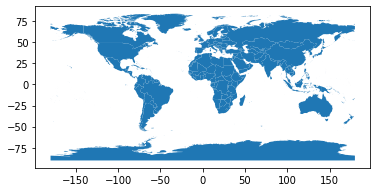

In [100]:
#Let us plot and check how our world map looks like without any data
world_map.plot()

A GeoDataFrame may also contain other columns with geometrical (shapely) objects, but only one column can be the active geometry at a time. Geometries are stored in a column called geometry that is a default column name for storing geometric information in geopandas. Geopandas takes advantage of Shapely’s geometric objects. 
Our shapefile - ne_50m_admin_0_countries.shp contains a column named 'geometry. Currently, it is the active geometry column with country borders which Geopandas will use while plotting. 
We can see a world map with country boundaries marked.

#### Read the csv File

In [ ]:
world_map['area'] = world_map.area

In [101]:
#Let us read the csv file containing details about the happiness rankings.
world_happiness = pd.read_csv("world-happiness-report-2019.csv")
world_happiness.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Looking at both the datasets, we can join both the tables on 'SOVEREIGNT' from world_map and 'Country (region)' from world_happiness table. But, before we join the two tables, let us clean them.

### Data Cleaning
We can see a lot of columns in the world_map table and we would not be needing all the columns. So we can drop the columns which we don't require.
Also, we will check if 'SOVEREIGNT' and 'Country (region)' columns have same names for the countries. If not, we will have to replace those names in one table so that they match the names in the other table.

In [102]:
#Drop all unwanted columns from world_map
world_map.drop(['featurecla', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'ADM0_A3', 'GU_A3', 
                'SU_DIF', 'GEOUNIT', 'SU_DIF', 'SU_DIF', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
                'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 
                            'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_YEAR', 'LASTCENSUS', 'GDP_YEAR', 'WIKIPEDIA', 
                            'FIPS_10_', 'ISO_A2', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 
                            'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN', 'ADM0_A3_WB', 'SUBREGION', 
                            'REGION_WB', 'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM', 'MIN_LABEL', 
                            'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN', 'NAME_DE', 'NAME_EN', 'NAME_ES', 
                            'NAME_FR', 'NAME_EL', 'NAME_HI', 'NAME_HU', 'NAME_ID', 'NAME_IT','NAME_JA', 'NAME_KO', 
                            'NAME_NL', 'NAME_PL', 'NAME_PT', 'NAME_RU', 'NAME_SV', 'NAME_TR', 'NAME_VI', 'NAME_ZH'], 
                           axis=1, inplace=True)

In [103]:
#Check the data in remaining columns
world_map.head(20)

,scalerank,LABELRANK,SOVEREIGNT,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,POP_EST,POP_RANK,GDP_MD_EST,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,geometry
0,1,3,Zimbabwe,Zimbabwe,ZWE,0,Zimbabwe,Zimbabwe,13805084,14,28330.0,5. Emerging region: G20,5. Low income,Africa,Africa,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,1,3,Zambia,Zambia,ZMB,0,Zambia,Zambia,15972000,14,65170.0,7. Least developed region,4. Lower middle income,Africa,Africa,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,1,3,Yemen,Yemen,YEM,0,Yemen,Yemen,28036829,15,73450.0,7. Least developed region,4. Lower middle income,Asia,Asia,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,3,2,Vietnam,Vietnam,VNM,0,Vietnam,Vietnam,96160163,16,594900.0,5. Emerging region: G20,4. Lower middle income,Asia,Asia,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,5,3,Venezuela,Venezuela,VEN,0,Venezuela,Venezuela,31304016,15,468600.0,5. Emerging region: G20,3. Upper middle income,South America,Americas,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."
5,6,6,Vatican,Vatican,VAT,0,Vatican,Vatican,1000,3,0.0,2. Developed region: nonG7,2. High income: nonOECD,Europe,Europe,"POLYGON ((12.43916 41.89839, 12.43057 41.89756..."
6,1,4,Vanuatu,Vanuatu,VUT,0,Vanuatu,Vanuatu,282814,10,723.0,7. Least developed region,4. Lower middle income,Oceania,Oceania,"MULTIPOLYGON (((166.74580 -14.82686, 166.81016..."
7,1,3,Uzbekistan,Uzbekistan,UZB,0,Uzbekistan,Uzbekistan,29748859,15,202300.0,6. Developing region,4. Lower middle income,Asia,Asia,"MULTIPOLYGON (((70.94678 42.24868, 70.97900 42..."
8,1,4,Uruguay,Uruguay,URY,0,Uruguay,Uruguay,3360148,12,73250.0,5. Emerging region: G20,3. Upper middle income,South America,Americas,"POLYGON ((-53.37061 -33.74219, -53.41958 -33.7..."
9,3,6,Federated States of Micronesia,Federated States of Micronesia,FSM,0,Micronesia,Federated States of Micronesia,104196,9,314.0,6. Developing region,4. Lower middle income,Oceania,Oceania,"MULTIPOLYGON (((162.98320 5.32573, 162.99346 5..."


We can see that there are multiple rows for countries with different names, we will select only the main areas of the countries where 'SOVEREIGNT' matches with 'NAME'.

In [104]:
world_map = world_map[world_map["SOVEREIGNT"] == world_map["NAME"]]

In [105]:
#Rename column name
world_happiness = world_happiness.rename({'Country (region)' : 'Country'}, axis = 1)

In [106]:
world_happiness.head()

,Country,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [107]:
#Check if column names are same in both the tables
world_map["SOVEREIGNT"].unique()

array(['Zimbabwe', 'Zambia', 'Yemen', 'Vietnam', 'Venezuela', 'Vatican',
       'Vanuatu', 'Uzbekistan', 'Uruguay', 'United States of America',
       'United Kingdom', 'United Arab Emirates', 'Ukraine', 'Uganda',
       'Turkmenistan', 'Turkey', 'Tunisia', 'Trinidad and Tobago',
       'Tonga', 'Togo', 'Thailand', 'Tajikistan', 'Taiwan', 'Syria',
       'Switzerland', 'Sweden', 'eSwatini', 'Suriname', 'Sudan',
       'Sri Lanka', 'Spain', 'South Korea', 'South Africa', 'Somalia',
       'Somaliland', 'Slovakia', 'Slovenia', 'Singapore', 'Sierra Leone',
       'Seychelles', 'Senegal', 'Saudi Arabia', 'SÃ£o TomÃ© and Principe',
       'San Marino', 'Samoa', 'Saint Lucia', 'Rwanda', 'Russia',
       'Romania', 'Qatar', 'Portugal', 'Poland', 'Philippines', 'Peru',
       'Paraguay', 'Papua New Guinea', 'Panama', 'Palau', 'Pakistan',
       'Oman', 'Norway', 'North Korea', 'Nigeria', 'Niger', 'Nicaragua',
       'New Zealand', 'Netherlands', 'Nepal', 'Nauru', 'Namibia',
       'Mozambique'

In [108]:
world_happiness["Country"].unique()

array(['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands',
       'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria',
       'Australia', 'Costa Rica', 'Israel', 'Luxembourg',
       'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'United States',
       'Czech Republic', 'United Arab Emirates', 'Malta', 'Mexico',
       'France', 'Taiwan', 'Chile', 'Guatemala', 'Saudi Arabia', 'Qatar',
       'Spain', 'Panama', 'Brazil', 'Uruguay', 'Singapore', 'El Salvador',
       'Italy', 'Bahrain', 'Slovakia', 'Trinidad and Tobago', 'Poland',
       'Uzbekistan', 'Lithuania', 'Colombia', 'Slovenia', 'Nicaragua',
       'Kosovo', 'Argentina', 'Romania', 'Cyprus', 'Ecuador', 'Kuwait',
       'Thailand', 'Latvia', 'South Korea', 'Estonia', 'Jamaica',
       'Mauritius', 'Japan', 'Honduras', 'Kazakhstan', 'Bolivia',
       'Hungary', 'Paraguay', 'Northern Cyprus', 'Peru', 'Portugal',
       'Pakistan', 'Russia', 'Philippines', 'Serbia', 'Moldova', 'Libya',
       'Montenegro', 'Tajik

In [109]:
#Replace country names in world_map before joining both tables
world_map.SOVEREIGNT.replace(['United States of America', 'Czechia'], ['United States', 'Czech Republic'], inplace=True)

### Join tables
There are two ways to combine datasets in geopandas – attribute joins and spatial joins.
In an attribute join, a GeoSeries or GeoDataFrame is combined with a regular pandas Series or DataFrame based on a common variable. This is analogous to normal merging or joining in pandas.
In a Spatial Join, observations from to GeoSeries or GeoDataFrames are combined based on their spatial relationship to one another.

We will use the attribute join for world_map and world_happiness tables on keys 'SOVEREIGNT' and 'Country' respectively.
Attribute joins are accomplished using the merge method. It is recommended to use the merge method called from the spatial dataset - world_map in our case.

In [110]:
merged_world_data = world_map.merge(world_happiness, left_on = 'SOVEREIGNT', right_on = 'Country')

### Plot Choropleth Maps
Geopandas makes it easy to create Choropleth maps (maps where the color of each shape is based on the value of an associated variable).
We will plot Choropleth maps for each country for:
- Happiness Rank, 
- Economic Development, 
- Population Rank and 
- Income Group 

In [112]:
#Function to plot map based on the selected column - variable to plot, minimum and maximum values and the cmap
def plot_map(variable, vmin, vmax, title, cmap):
    #Create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(20, 10))
    #Plot data for the selected column
    merged_world_data.plot(column=variable, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')
    #Remove axis
    ax.axis('off')
    
    #Set the title of the map
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'})
    #Create an annotation for the data source
    ax.annotate('Source: data.world, 2019',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
    
    #Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    ##mpty array for the data range
    sm._A = []
    #Add colorbar to the figure
    cbar = fig.colorbar(sm)

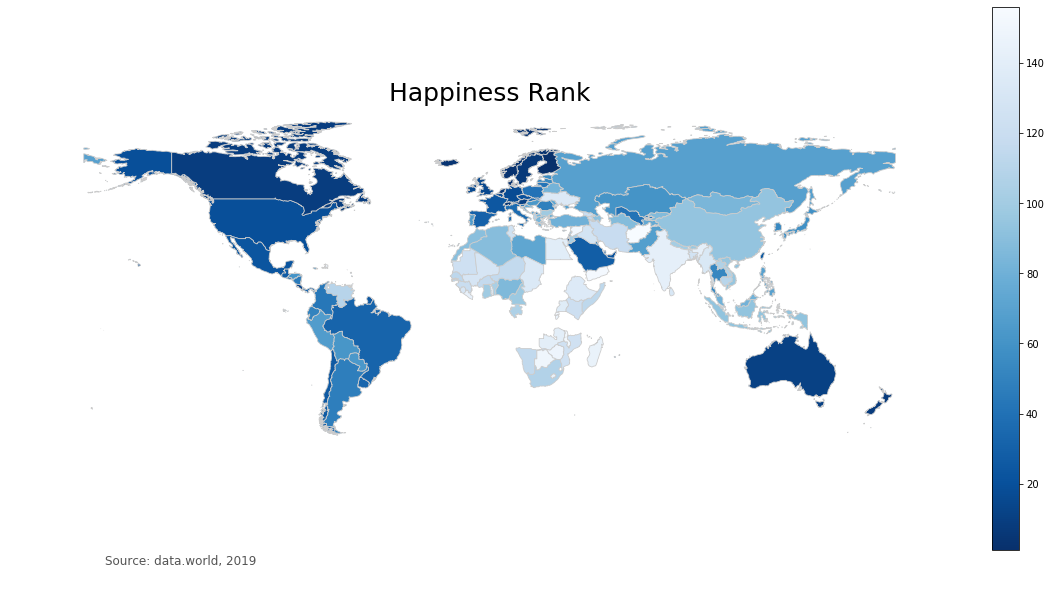

In [113]:
#Plot the happiness rank for all countries
plot_map('Ladder', 1, 156, "Happiness Rank", "Blues_r")

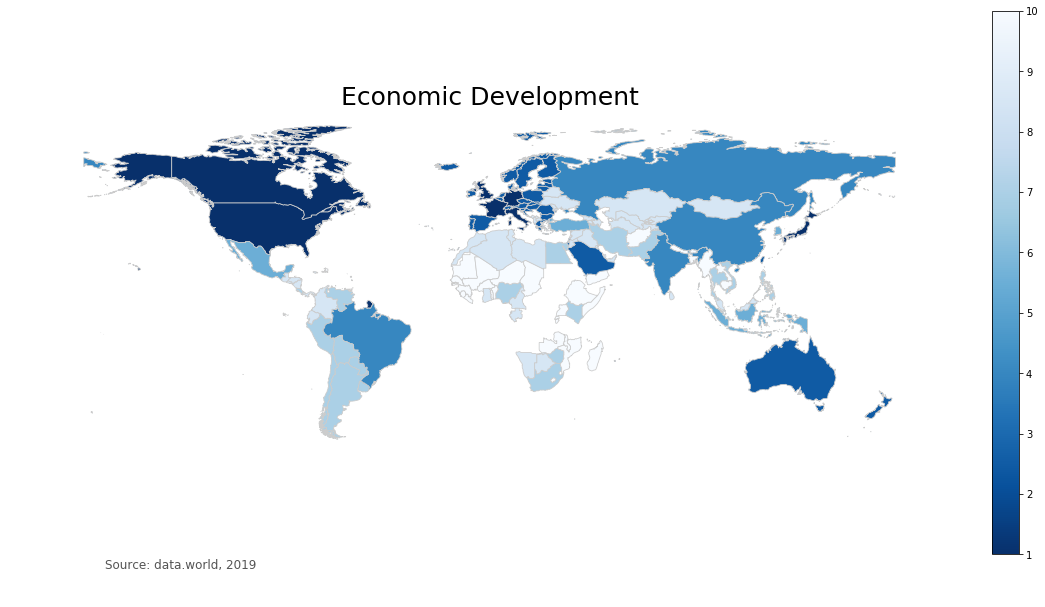

In [114]:
#Plot the economic development number for all countries (1. Developed region: G7 and 7. Least developed region)
plot_map('ECONOMY', 1, 10, "Economic Development", "Blues_r")

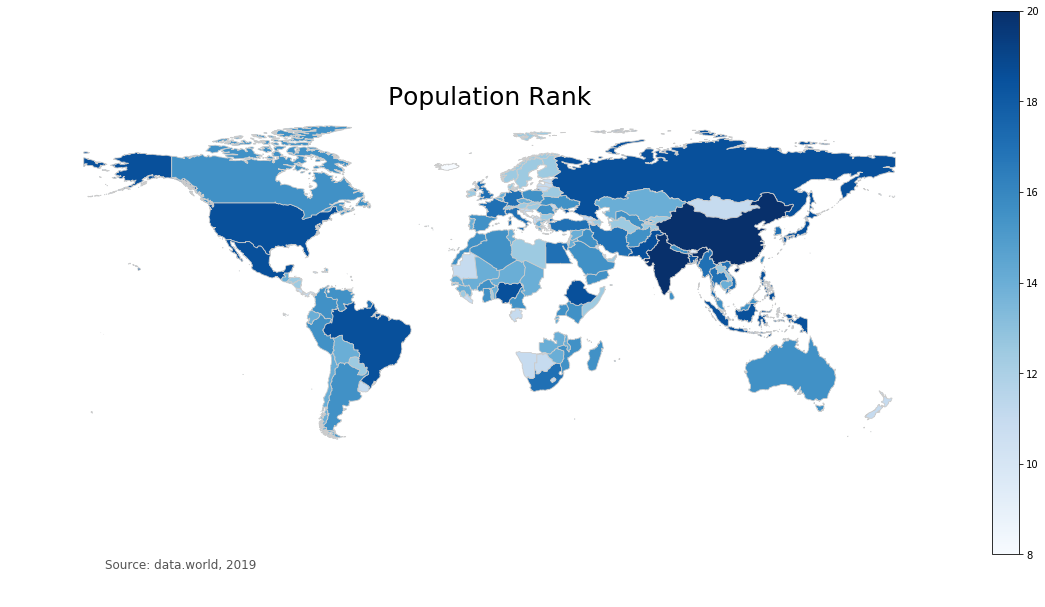

In [115]:
#Plot the population rank for all countries
plot_map('POP_RANK', 8, 20, "Population Rank", "Blues")

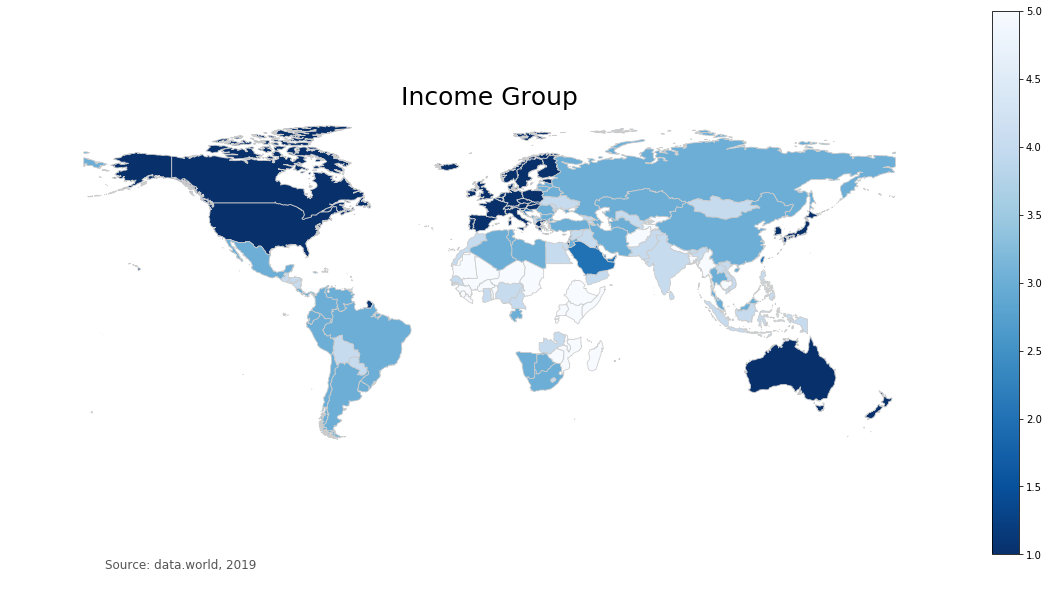

In [116]:
#Plot the Income group for all countries (1. High income: OECD and 5. Low income)
plot_map('INCOME_GRP', 1, 5, "Income Group", "Blues_r")